<p style="font-family:newtimeroman;font-size:400%;text-align:center;color:white;">Amazon Sales Dataset</p>



<p style="font-family:Arial; font-size:30px; color:white; background-color:black; padding:10px; border-radius:10px;">
                                    Detecting Outliers
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
%matplotlib inline


In [3]:
df = pd.read_csv("cleaned_data.csv")
#df.head()

### Step 1: Detecting Outliers Using Boxplot
- We will use Boxplot to identify the outliers in key columns such as: actual price , discount percentage , rating , and rating count .

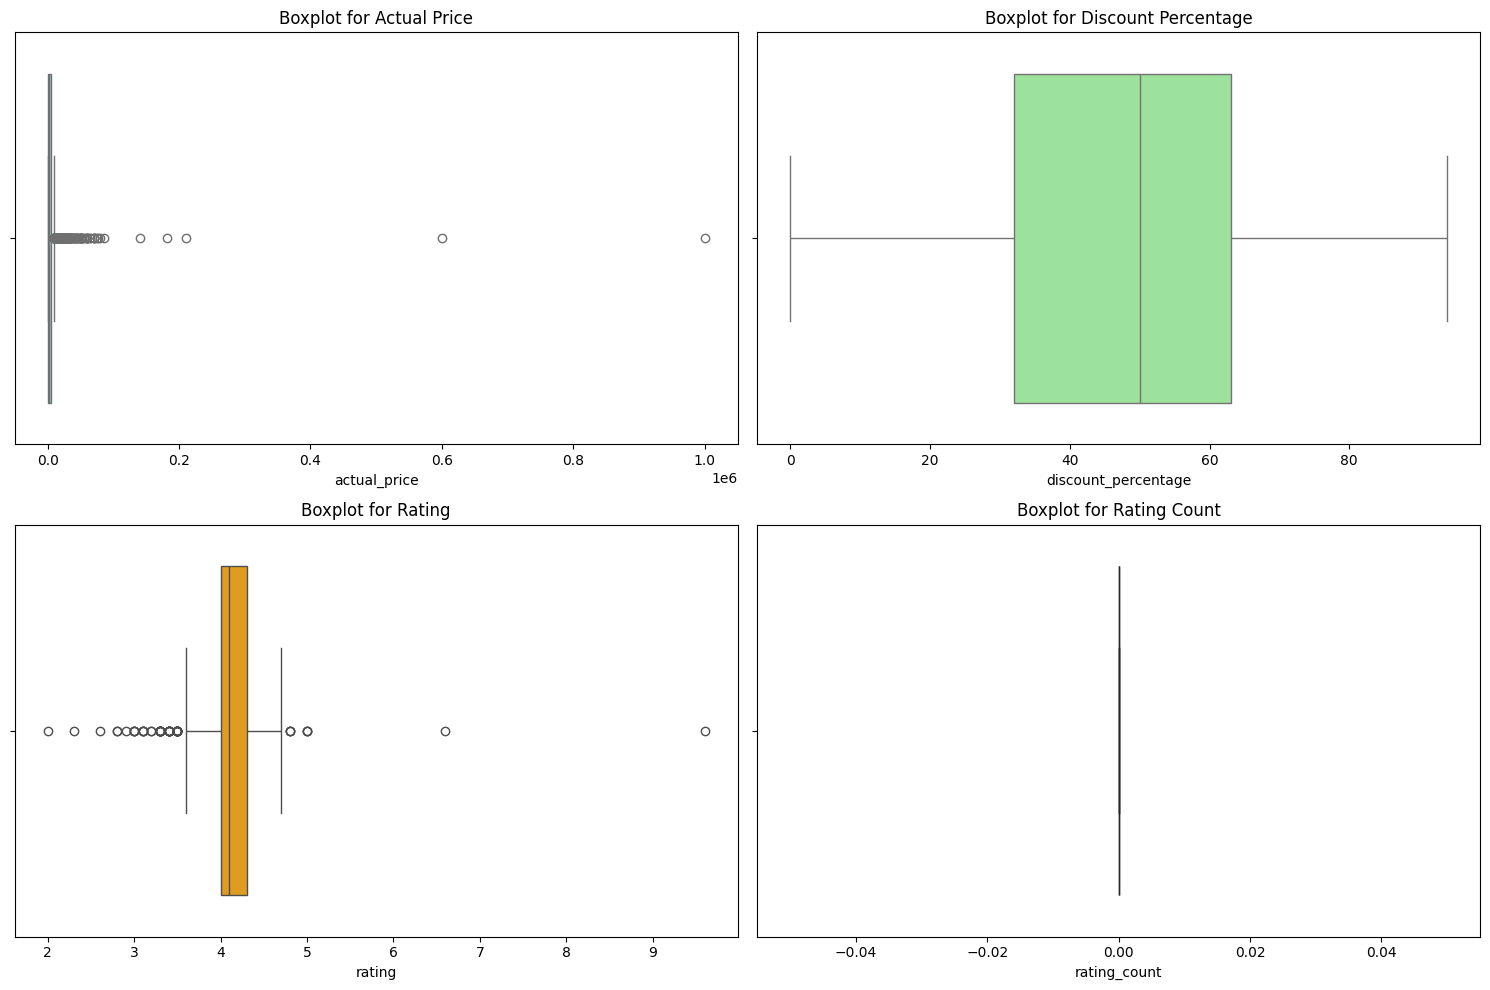

In [4]:
# Plotting boxplots to detect outliers in different columns
plt.figure(figsize=(15,10))

# Actual Price Outliers
plt.subplot(2, 2, 1)
sns.boxplot(x=df['actual_price'], color='skyblue')
plt.title('Boxplot for Actual Price')

# Discount Percentage Outliers
plt.subplot(2, 2, 2)
sns.boxplot(x=df['discount_percentage'], color='lightgreen')
plt.title('Boxplot for Discount Percentage')

# Rating Outliers
plt.subplot(2, 2, 3)
sns.boxplot(x=df['rating'], color='orange')
plt.title('Boxplot for Rating')

# Rating Count Outliers
plt.subplot(2, 2, 4)
sns.boxplot(x=df['rating_count'], color='purple')
plt.title('Boxplot for Rating Count')

plt.tight_layout()
plt.show()


### Step 2: Detecting Outliers Using Z-score
- We will use Z-score to detect if the data points are far from the mean by a significant number of standard deviations.
- Z-score measures how many standard deviations a value is away from the mean.
- If the Z-score is greater than 3 or less than -3, it can be considered an outlier.



In [10]:

# Calculate Z-scores for numeric columns
numeric_columns = ['actual_price', 'discount_percentage', 'rating', 'rating_count']

# Calculate the mean and standard deviation for each numeric column
mean = df[numeric_columns].mean()
std = df[numeric_columns].std()

z_scores = (df[numeric_columns] - mean) / std

# Flag outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Show the rows with outliers
outlier_rows = df[outliers.any(axis=1)]
outlier_rows



,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
128,B09MM6P76N,7SEVEN® Compatible Lg Smart Tv Remote Suitable...,"Electronics|HomeTheater,TV&Video|Accessories|R...",349.0,599.0,42.0,9.6,0.0,Best Compatible Remote Control for LG televisi...,"AFQW4AC4GLYGQC4MXQWMGJM2FWRA,AGLLHPCKRL6U2U6U5...","Swapnil N,Abhishek Maji,Dinesh B.,Sangeet,Geor...","R13ILSZ9UIVWZM,R3U8Q4IBUKCLZV,R3350GX4GSKBOU,R...","Works for LG 4K LED,Awesome product,Good copy ...",My LG smart 4K TV’s magic remote went kaput an...,https://m.media-amazon.com/images/I/31Bfu6liMW...,https://www.amazon.in/7SEVENTM-Universal-Repla...
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,44.0,4.7,0.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery people were not careful with the ...,https://m.media-amazon.com/images/I/51uVckL1jR...,https://www.amazon.in/Sony-Bravia-inches-Googl...
263,B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG...,"Electronics|HomeTheater,TV&Video|Accessories|R...",790.0,1999.0,60.0,3.0,0.0,for LG TV series All Models of Remote Control ...,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...","Jarlina Nath,Sona,Ranjit Harchekar,Myneni Sune...","R1S2PH1JD9B9XB,R3UUKCS12Q0B9X,R16YH8SVJU5W61,R...","Not good,No voice recognition, No pointer ray ...",The mouse feature of the remote is not working...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Compatible-Suitable-Cont...
270,B0B997FBZT,Acer 139 cm (55 inches) H Series 4K Ultra HD A...,"Electronics|HomeTheater,TV&Video|Televisions|S...",35999.0,49990.0,28.0,6.6,0.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AEJGEJAGW7MDJMBVY7KB7KBKIYYQ,AEWP2ARX3R62X4MJM...","Moon Tej,Aditya sikarwar,P kanaka raju,Ajay,Pr...","R19Q6OQ19PWL5K,RXWY3WK7QVN25,R10S2P5H6YODNY,R2...","Tv working good.,Value of money,Acer 32 Sound...","Tv working good, the screen is VA type, if we ...",https://m.media-amazon.com/images/I/51aFoI9nNZ...,https://www.amazon.in/Acer-inches-Ultra-Androi...
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,3.0,0.0,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
545,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,281.0,1999.0,86.0,2.8,0.0,"✅ All-day activity tracking: Track steps, dist...","AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...","dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...","RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...","Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",https://m.media-amazon.com/images/I/41lnTFZGz9...,https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...
550,B0B82YGCF6,Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...,Electronics|WearableTechnology|SmartWatches,899.0,3499.0,74.0,3.0,0.0,【Bluetooth Calling Watch】- Tokdis MX-1 Pro ena...,"AFEMYJODFSKRPR4XTYKCPXMCO4YA,AH7PGDCSET6C5NOBB...","Gourav Choudhrani,Mustak ali,Amit,Pankaj solan...","RGEDIZCX7LB34,R19GGFEAAXAUKK,R3L3EFRRM8X2IY,RE...","Its is good but battery life is very poor,Hear...","Its is value for money,,Good product,Good, lik...",https://m.media-amazon.com/images/I/31M4nb0+JK...,https://www.amazon.in/Tokdis-MX-1-Bluetooth-Ca...
561,B0B5YBGCKD,POPIO Tempered Glass Compatible for iPhone 13 ...,Elect

### Step 3: Summarizing the Findings
After detecting the outliers, we summarize the findings based on:
- Whether the outliers are actual abnormal results.
- Their impact on the analysis.
- Whether they should be removed or kept in the analysis.



In [11]:
# Summary of findings
outliers_summary = {
    "Number of Outliers in Actual Price": len(outlier_rows[outlier_rows['actual_price'].notna()]),
    "Number of Outliers in Discount Percentage": len(outlier_rows[outlier_rows['discount_percentage'].notna()]),
    "Number of Outliers in Rating": len(outlier_rows[outlier_rows['rating'].notna()]),
    "Number of Outliers in Rating Count": len(outlier_rows[outlier_rows['rating_count'].notna()])
}

outliers_summary


{'Number of Outliers in Actual Price': 21,
 'Number of Outliers in Discount Percentage': 21,
 'Number of Outliers in Rating': 21,
 'Number of Outliers in Rating Count': 21}

### Step 4: Visualizing Outliers in a Scatter Plot
- We will visualize the outliers using a scatter plot to understand where the outliers are located in relation to the rest of the data.

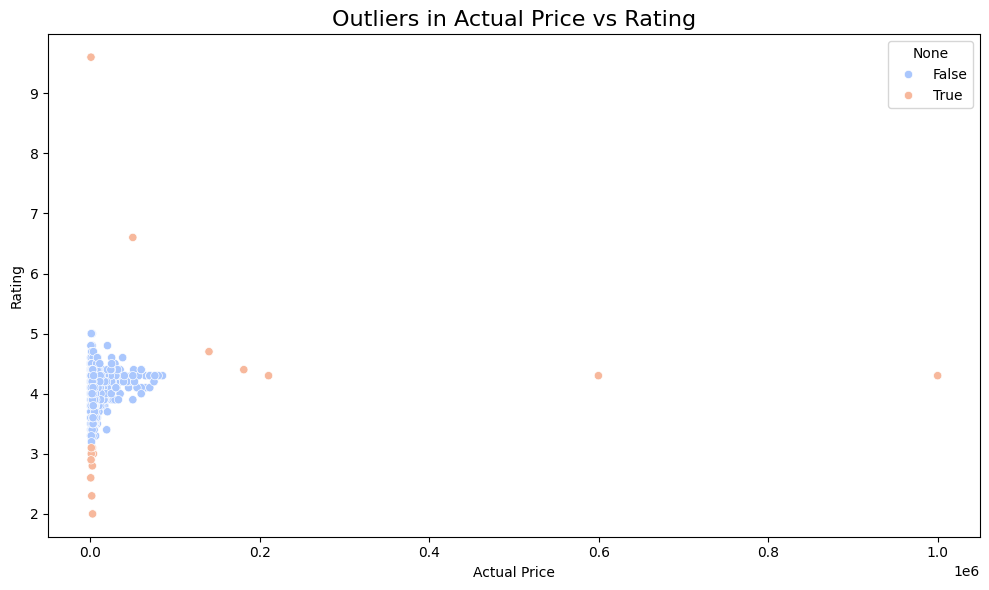

In [12]:
# Scatter plot to visualize outliers in Actual Price vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['actual_price'], y=df['rating'], hue=outliers.any(axis=1), palette='coolwarm')
plt.title("Outliers in Actual Price vs Rating", fontsize=16)
plt.xlabel("Actual Price")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


### Step 5: Handle Outliers
- If the outliers are important and reflect actual product behavior, we may choose to keep them.

- If the outliers are caused by errors in data collection, we should either remove them or replace them with suitable values.